In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [93]:
car_dataset=pd.read_csv('car data.csv')

In [94]:
car_dataset

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [95]:
car_dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [96]:
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [97]:
car_dataset['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [98]:
car_dataset['Car_Name'].value_counts()

city                26
corolla altis       16
verna               14
fortuner            11
brio                10
                    ..
Hyosung GT250R       1
800                  1
corolla              1
etios gd             1
Honda CB Trigger     1
Name: Car_Name, Length: 98, dtype: int64

In [99]:
car_dataset['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [100]:
car_dataset['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [101]:
car_dataset['Owner'].value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

In [102]:
#encoding the  categorical data
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2},'Seller_Type':{'Dealer':0,'Individual':1},'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [103]:
car_dataset

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


In [104]:
Scaler=StandardScaler()

In [105]:
X=car_dataset.drop(['Car_Name','Year','Selling_Price'],axis=1)
y=car_dataset['Selling_Price']

In [106]:
print(X)
print(y)

     Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  Owner
0             5.59       27000          0            0             0      0
1             9.54       43000          1            0             0      0
2             9.85        6900          0            0             0      0
3             4.15        5200          0            0             0      0
4             6.87       42450          1            0             0      0
..             ...         ...        ...          ...           ...    ...
296          11.60       33988          1            0             0      0
297           5.90       60000          0            0             0      0
298          11.00       87934          0            0             0      0
299          12.50        9000          1            0             0      0
300           5.90        5464          0            0             0      0

[301 rows x 6 columns]
0       3.35
1       4.75
2       7.25
3       2.85
4       4.60

In [107]:
Scaler.fit(X)

StandardScaler()

In [108]:
standardized_data=Scaler.transform(X)

In [109]:
standardized_data

array([[-0.23621461, -0.25622446, -0.50018321, -0.73728539, -0.39148015,
        -0.17450057],
       [ 0.22150462,  0.1559105 ,  1.85224094, -0.73728539, -0.39148015,
        -0.17450057],
       [ 0.25742689, -0.77396901, -0.50018321, -0.73728539, -0.39148015,
        -0.17450057],
       ...,
       [ 0.39068691,  1.31334003, -0.50018321, -0.73728539, -0.39148015,
        -0.17450057],
       [ 0.56450434, -0.7198763 ,  1.85224094, -0.73728539, -0.39148015,
        -0.17450057],
       [-0.20029235, -0.81095812, -0.50018321, -0.73728539, -0.39148015,
        -0.17450057]])

In [110]:
X=standardized_data
y=car_dataset['Selling_Price']

In [111]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=2)

In [112]:
#loadinng thhhe linnnear regression model
lin_reg_mmodel=LinearRegression()

In [113]:
lin_reg_mmodel.fit(X_train,y_train)

LinearRegression()

In [114]:
#predictionn onn training data
training_data_prediction=lin_reg_mmodel.predict(X_train)

In [115]:
#R squared Error
error_score=metrics.r2_score(y_train,training_data_prediction)
print('R squared Error: ',error_score)

R squared Error:  0.8436560552322556


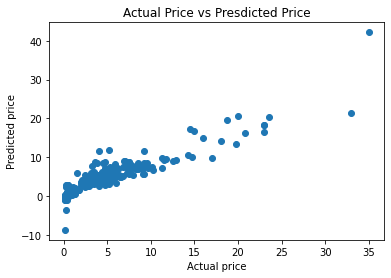

In [116]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel("Actual price")
plt.ylabel('Predicted price')
plt.title("Actual Price vs Presdicted Price")
plt.show()

In [117]:
test_data_prediction=lin_reg_mmodel.predict(X_test)

In [118]:
#R squared Error
error_score=metrics.r2_score(y_test,test_data_prediction)
print('R squared Error: ',error_score)

R squared Error:  0.8036224315761519


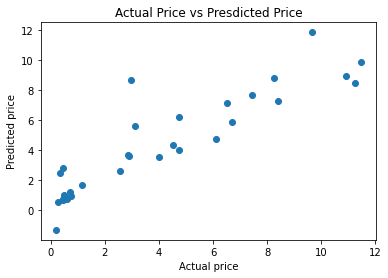

In [119]:
plt.scatter(y_test,test_data_prediction)
plt.xlabel("Actual price")
plt.ylabel('Predicted price')
plt.title("Actual Price vs Presdicted Price")
plt.show()

In [120]:
#Lasso Regression
lass=Lasso()

In [121]:
lass.fit(X_train,y_train)

Lasso()

In [122]:
trann_data_pred=lass.predict(X_train)
#R squared Error
error_score=metrics.r2_score(y_train,trann_data_pred)
print('R squared Error: ',error_score)

R squared Error:  0.7407132824789029


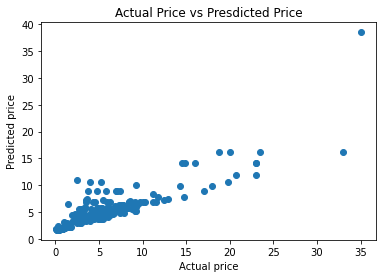

In [123]:
plt.scatter(y_train,trann_data_pred)
plt.xlabel("Actual price")
plt.ylabel('Predicted price')
plt.title("Actual Price vs Presdicted Price")
plt.show()

In [124]:
test_data_pred=lass.predict(X_test)
#R squared Error
error_score=metrics.r2_score(y_test,test_data_pred)
print('R squared Error: ',error_score)

R squared Error:  0.7821770394995182


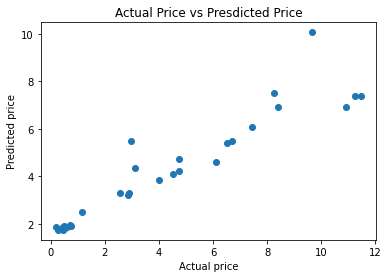

In [125]:
plt.scatter(y_test,test_data_pred)
plt.xlabel("Actual price")
plt.ylabel('Predicted price')
plt.title("Actual Price vs Presdicted Price")
plt.show()

In [136]:
input_data=(X[1])
input_data_array=np.asarray(input_data)
reshape_array=input_data_array.reshape(1,-1)

prediction=lass.predict(reshape_array)
prediction

array([5.76233174])

In [129]:
X[3]

array([-0.40307935, -0.81775835, -0.50018321, -0.73728539, -0.39148015,
       -0.17450057])